In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 2

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]


In [2]:
## The nearest neighbours classifier 



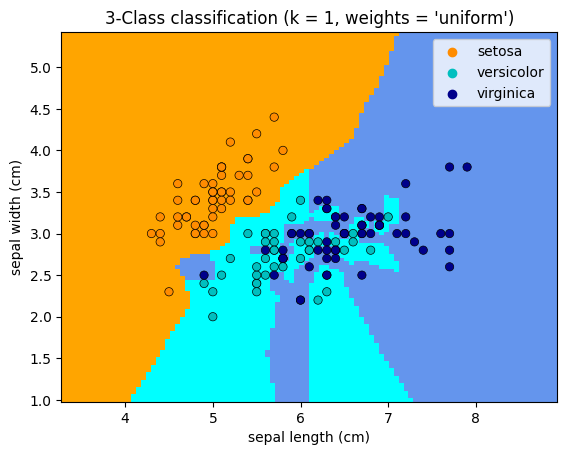

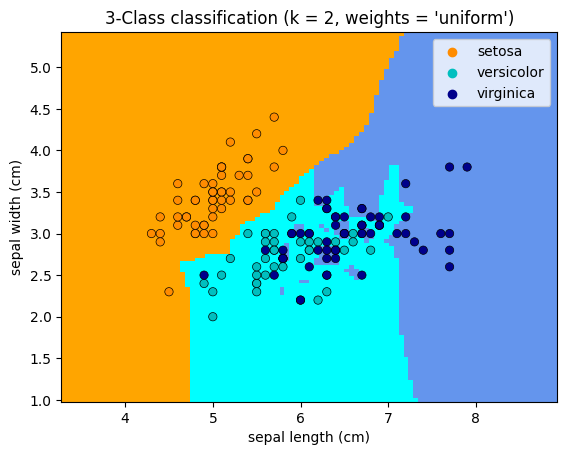

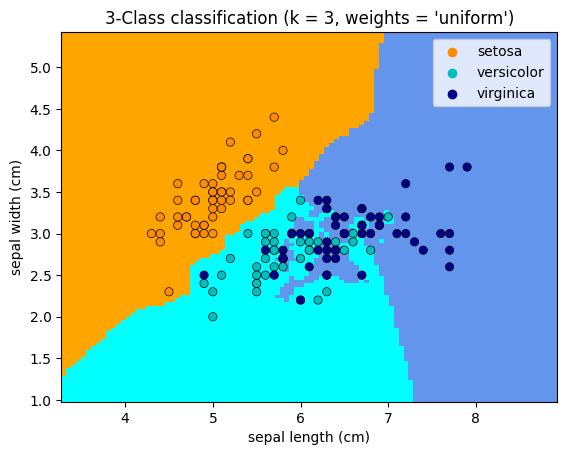

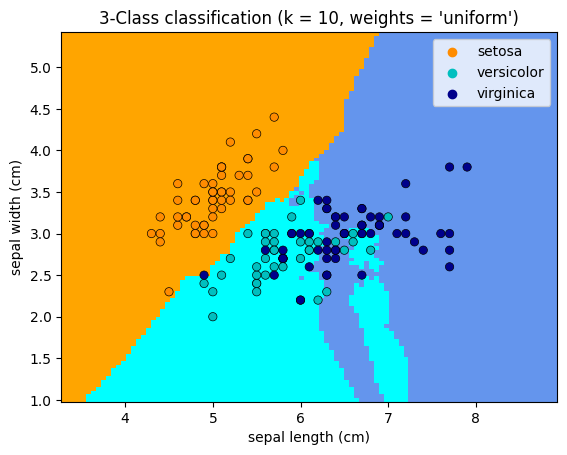

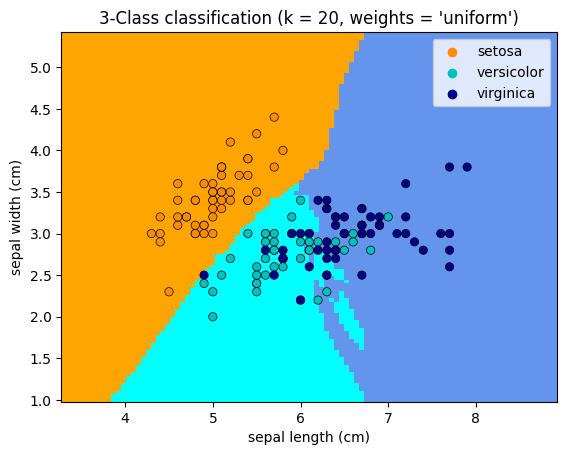

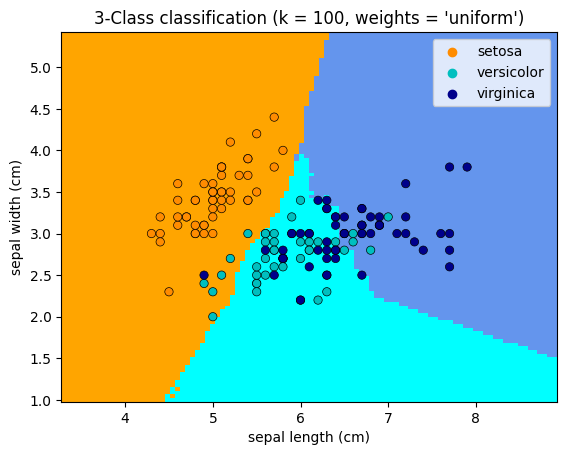

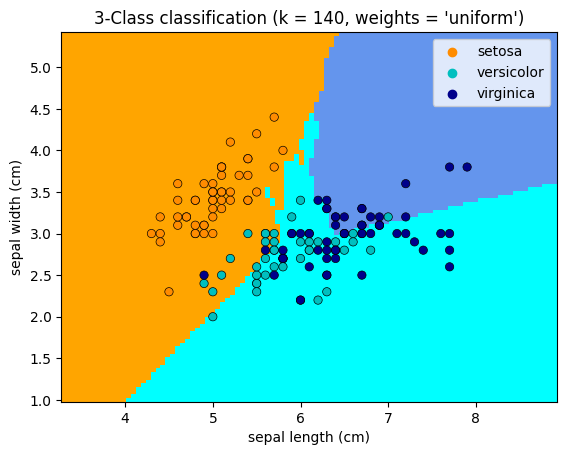

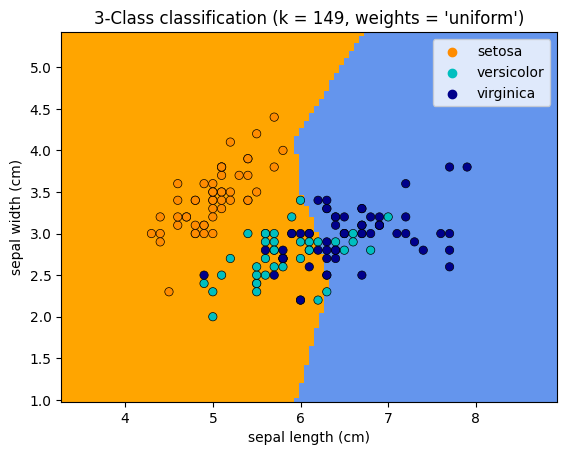

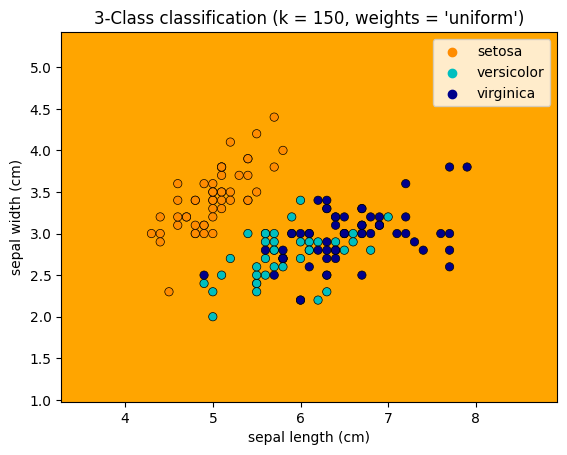

In [3]:
weights = "uniform"
for n_neighbors in [1, 2, 3, 10, 20, 100, 140, 149, 150]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

# sklearn standard methods

Nearly all models in scikit-learn implement the following methods:

- clf.fit(X, y): Fits labelled data
- clf.predict(X): predict labels given the features
- clf.predict_proba(X): predict label probabilities given the features (not all models have this method)

## Measuring model quality

    accuracy_score(y, a)

This returns the average accuracy:
$$\sum_{t=1}^T I\{y_t = a_t\} / T$$
where $I\{y_t = a_t\}$ is 1 when the prediction $a_t$ is equal to the label $y_t$, and 0 otherwise.

    log_loss(y, p)

This returns the average log loss
$$\sum_{t=1}^T \ln p_{t,i} / T$$
where $p_{t,i} = P(y_t = i | x_t)$ should be a martix of label probabilities for each example $t$ and label $i$.




In [18]:
# Measuring performance
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
# We now use all features
X = iris.data
y = iris.target
n_neighbors = 1
# we can save the accuracy/loss in those arrays
acc = np.zeros(150)
loss = np.zeros(150)
# go through all values of K
for n_neighbors in range(1, 100):
    ## Fit a k-NN classifier on all the data 
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    ## Calculate the accuracy score, based on the predicted labels 
    y_predicted = clf.predict(X)
    acc[n_neighbors - 1] = accuracy_score(y, y_predicted)
    ## Calculate the log-loss score, based on the label probabilities 
    y_probabilities = clf.predict_proba(X)
    loss[n_neighbors - 1] = log_loss(y, y_probabilities)


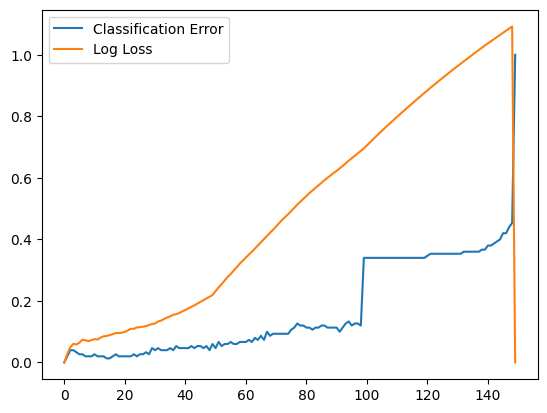

In [30]:
plt.plot(1 - acc)
plt.plot(loss)
plt.legend(["Classification Error", "Log Loss"])


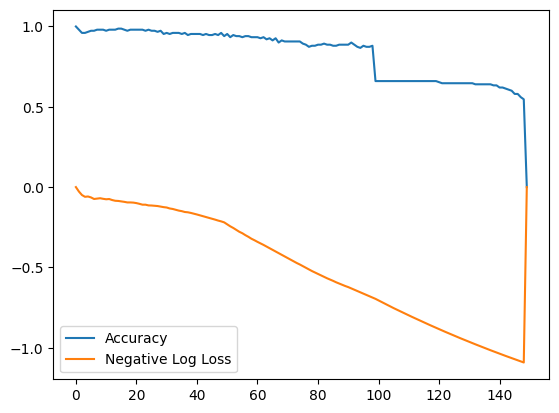

In [31]:
plt.plot(acc)
plt.plot(-loss)
plt.legend(["Accuracy", "Negative Log Loss"])


In [38]:
## Training and testing
## Find the best-performing value of k on the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
## Loop over n_neighbours
## For each value, calculate (a) the accuracy and (b) the log loss on both the train set and the test set
## What is the best value of k in each case?


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
## Does scaling help?
## Do we get better performance if we scale the data? 
## Plot the results again for increasing k. Is the optimal k different?
from sklearn.preprocessing import StandardScaler
 

## Measuring model quality

Here you need to implement the function

    utility_score(y, a, U)

which returns a score according to the following formula:
$$\sum_{t=1}^T U(a_t, y_t) / T$$.

Here `y`, `a` are arrays, with `y[t]` being $y_t$ and `a[t]` being $a_t$. 
`U` is a function returning a real number, and is implemented below as `utility_function`

|  U  | y=0 | y=1 | y=2 |
| --- | --- | --- | --- |
| a=0 |  0  |  1  | -10 |
| a=1 | -1  |  1  |  -1 |
| a=2 | -2  |  -2 |  2  |





In [ ]:
def utility_function(a, y):
    # implementation hint: Define a matrix U with the correct entries and simply return U[a,y] 
    pass

In [1]:
# After you implement the function, use it to evaluate your classification model in training and and testing.
# Plot the results for different n_neigbhors


SyntaxError: invalid syntax (286652004.py, line 1)

In [ ]:
# How can you better use your kNN model, in order to obtain better performance under the utility_score measure? Only explain in words, no need to implement this, it will be done in class.